In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

In [2]:
def compute_purity(y_train, y_train_predict, y_actual, y_predict, y_label):
    
    cluster_label_map = dict()
    unique, counts = np.unique(y_train_predict, return_counts=True)
    cluster_dict = dict(zip(unique, counts))
    class_dict = dict()
    y_list = y_train[y_label].tolist()
    for i in y_train[y_label].unique():
        class_dict[i] = y_list.count(i)
    while cluster_dict:
        cluster = max(cluster_dict,key=cluster_dict.get)
        clas = max(class_dict,key=class_dict.get)
        cluster_label_map[cluster] = clas
        del cluster_dict[cluster]
        del class_dict[clas]
    y_pred = map(lambda x : cluster_label_map[x], y_predict)
    y_act = y_actual[y_label].tolist()
    
    correct = 0
    for i in range(0,len(y_act)):
        if y_act[i] == y_pred[i]:
            correct += 1
    purity = float(correct)/float(len(y_act))
    return purity

In [3]:
def plot_dendrogram(model, **kwargs):

    children = model.children_
    distance = np.arange(children.shape[0])
    no_of_observations = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

In [4]:
data = pd.read_csv("compressed_intrusion_data_a.csv",header=None)
heading = list()
for i in range(1,15):
    heading.append('A'+str(i))
heading.append('xAttack')
data.columns = heading
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,xAttack
0,0.645767,0.623645,0.751609,0.620990,0.187584,0.437081,0.167047,0.484827,0.296492,0.665497,0.610416,0.681719,0.485009,0.764236,dos
1,0.187173,0.226052,0.759255,0.652515,0.248886,0.669317,0.690183,0.521835,0.828925,0.629275,0.597592,0.647198,0.265081,0.478803,dos
2,0.370563,0.530759,0.268358,0.383741,0.687811,0.529198,0.529663,0.422345,0.446172,0.547510,0.510030,0.286663,0.657549,0.305966,normal
3,0.529521,0.449775,0.451936,0.261041,0.622198,0.579708,0.556322,0.368201,0.561374,0.282816,0.343599,0.417690,0.432493,0.453444,normal
4,0.333522,0.423431,0.160733,0.860596,0.307309,0.217652,0.550967,0.170090,0.889630,0.493430,0.811699,0.630565,0.160230,0.863686,probe


In [5]:
cols = list()
for i in range(1,15):
    cols.append('A'+str(i))
X_train, X_test, y_train, y_test = train_test_split(
    data[cols],
    data[['xAttack']],
    test_size=0.3,
    random_state=0)
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
8293,0.497912,0.523420,0.368625,0.286114,0.631423,0.593639,0.655836,0.422385,0.552223,0.462616,0.319595,0.303312,0.474982,0.428555
23442,0.460349,0.505533,0.355743,0.283985,0.617167,0.527470,0.718460,0.449732,0.507160,0.469168,0.268490,0.289446,0.457118,0.398683
13790,0.641384,0.650647,0.751596,0.665158,0.258534,0.430108,0.238162,0.488501,0.287129,0.636253,0.539995,0.677452,0.487086,0.726626
4477,0.381219,0.388675,0.429413,0.188219,0.557053,0.408589,0.576617,0.764058,0.387152,0.383974,0.649025,0.561896,0.564513,0.345778
708,0.394177,0.583378,0.270525,0.633060,0.737072,0.735251,0.191649,0.723036,0.352910,0.275673,0.757130,0.609664,0.640754,0.179533


In [6]:
agg = AgglomerativeClustering(n_clusters=5)
y_pred_tr_agg = agg.fit_predict(X_train)
y_pred_ts_agg = agg.fit_predict(X_test)

In [7]:
train_purity = compute_purity(y_train, y_pred_tr_agg, y_train, y_pred_tr_agg, 'xAttack')
test_purity = compute_purity(y_train, y_pred_tr_agg, y_test, y_pred_ts_agg, 'xAttack')
print '******************** Agglomerative Clustering ********************************'
print 'Train data set purity : '+str(round(train_purity*100,2))+'%'
print 'Test data set purity : '+str(round(test_purity*100,2))+'%'

******************** Agglomerative Clustering ********************************
Train data set purity : 71.29%
Test data set purity : 34.95%


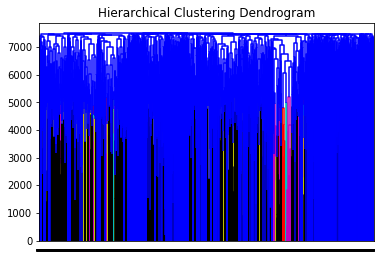

In [8]:
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agg, labels=agg.labels_)
plt.show()